In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import random

import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

os.environ['PYTHONHASHSEED'] = '0'

test_file="T_origin.pickle"
tmp = np.load(test_file)
data_14 = tmp.values

test = data_14[0]
num_large = 100


data_zif90 = test[:2251]
# data_zif90 = data_14[-3,:2251]

print(test[-1])
 

x1 = np.linspace(0, 2252,num=2251)

data_label = data_14[:,-1]
data_label

original_file="D_origin.pickle"
tmp = np.load(original_file)
data_186 = tmp.values


data_label_186 = data_186[:,-1]

names= [test[-1], 'DUT-23', 'ZIF-8', 'ZIF-65', 'JOSNAG01', 'ZIF-90', test[-1]]
print(names)
#data_label_186
DUT23 = np.where(data_label_186 == names[1])
ZIF8 = np.where(data_label_186 == names[2])
ZIF65 = np.where(data_label_186 == names[3])
JOSNAG01 = np.where(data_label_186 == names[4])
ZIF90 = np.where(data_label_186 == names[5])
ZIF67 = np.where(data_label_186 == names[6])


data_DUT23 = data_186[DUT23[0][0],:2251]
data_ZIF8 = data_186[ZIF8[0][0],:2251]
data_ZIF65 = data_186[ZIF65[0][0],:2251]
data_JOSNAG01 = data_186[JOSNAG01[0][0],:2251]
data_ZIF90 = data_186[ZIF90[0][0],:2251]
data_truth = data_186[ZIF67[0][0],:2251]

# print(data_186[-11,-1])

fft_len = 2304
# window = np.hamming(fft_len)
effect = int(fft_len / 2)

data = np.zeros((len(names), fft_len))
modd = np.zeros((len(names), fft_len))



mod_vals = np.zeros((len(names), num_large))

data[0, 20:2251+20] = data_zif90 - np.median(data_zif90)
data[1, 20:2251+20] = data_DUT23 - np.median(data_DUT23)
data[2, 20:2251+20] = data_ZIF8 - np.median(data_ZIF8)
data[3, 20:2251+20] = data_ZIF65 - np.median(data_ZIF65)
data[4, 20:2251+20] = data_JOSNAG01 - np.median(data_JOSNAG01)
data[5, 20:2251+20] = data_ZIF90 - np.median(data_ZIF90)
data[len(names)-1, 20:2251+20] = data_truth - np.median(data_truth)

magnitd = np.zeros((len(names), effect))

for i in range(len(names)):
	# data[i] /= np.max(np.abs(data[i]))
	data[i] /= np.std(np.abs(data[i]))

	tmp_complex = (np.fft.fft(data[i]))[1 : int(fft_len/2+1)]
	magnitd[i] = np.log(np.abs(tmp_complex) + 0.000001)


	thesthold = np.partition(data[i], -num_large)[-num_large]

	# modd[i] = np.median(data[i])

	tmp = data[i, data[i] >= thesthold]
	mod_vals[i] = tmp[:num_large]
	mod_vals[i] /= np.sum(mod_vals[i])
	mod_vals[i] = np.sort(mod_vals[i])

	modd[i, data[i] >= thesthold] = tmp



lcindex = 0
largest = -1
for i in range(1,len(names)):
	# mod_vals[i, int(num_large/2):] = 0
	val = mod_vals[0] @  mod_vals[i]
	print(i, round(val,4), names[i])
	if val > largest:
		lcindex = i
		largest = val

print(lcindex)

for index in range(len(names)):
       
	plt.clf()
	figname = str(index) + names[index] + 'time.eps'
	plt.plot(data[index],        'b', label='time')
	plt.savefig(figname)
	plt.close(0)


	plt.clf()
	figname = str(index) + names[index] + 'mod.eps'
	plt.plot(modd[index],        'b', label='time')
	plt.savefig(figname)
	plt.close(0)


	plt.clf()
	figname = str(index) + '.eps'
	plt.plot(magnitd[index],     'r', label='freq')

	plt.title(str(index) + names[index])
	plt.legend(bbox_to_anchor=(0.2, 1.08, 1., .102), loc=1)
	plt.savefig(figname)
	plt.close(0)



ZIF-67
['ZIF-67', 'DUT-23', 'ZIF-8', 'ZIF-65', 'JOSNAG01', 'ZIF-90', 'ZIF-67']
1 0.0231 DUT-23
2 0.0218 ZIF-8
3 0.0246 ZIF-65
4 0.0191 JOSNAG01
5 0.0241 ZIF-90
6 0.0237 ZIF-67
3


(array([  1.,   1.,   1.,   5.,   4.,   3.,   9.,  11.,  15.,  23.,  35.,
         54.,  67., 101., 127., 131., 130., 119.,  52.,  13.]),
 array([-1.55479831, -1.32329218, -1.09178606, -0.86027993, -0.6287738 ,
        -0.39726768, -0.16576155,  0.06574458,  0.2972507 ,  0.52875683,
         0.76026296,  0.99176908,  1.22327521,  1.45478134,  1.68628746,
         1.91779359,  2.14929972,  2.38080584,  2.61231197,  2.84381809,
         3.07532422]),
 <a list of 20 Patch objects>)

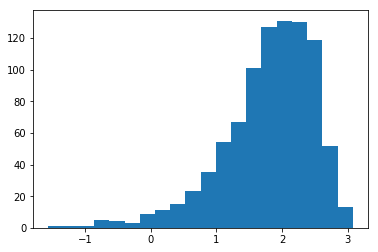

In [9]:
plt.hist(magnitd[0][250:],20)